In [1]:
# """
# The following example runs a pipe criticality analysis on large diameter pipes
# to compute the impact that pipe closures have on pressure in the system.  
# The analysis is run using a series of hydraulic simulations with one pipe 
# closed at a time and determines if minimum pressure criterion are met 
# at each junction.  Note that for many networks, simulations can fail when 
# certain pipes are closed. try:except blocks are recommended within the 
# simulation loop to catch these instances.
# """
# import numpy as np
# import wntr

# # Create a water network model 
# wn = wntr.network.WaterNetworkModel('data\\Net3.inp')

# # Adjust simulation options for criticality analyses
# analysis_end_time = 72*3600  
# wn.options.time.duration = analysis_end_time #Duração da simulação (segundos), por padrão 0.
# wn.options.hydraulic.demand_model = 'PDD' #Modelo de demanda para EPANET 2.2; os valores aceitáveis são "DD" e "PDD", por padrão "DD".
# wn.options.hydraulic.required_pressure = 17.57  #A pressão nodal necessária, por padrão 0,07 (m H2O)
# wn.options.hydraulic.minimum_pressure = 0

# # Create a list of pipes with large diameter to include in the analysis
# pipes = wn.query_link_attribute('diameter', np.greater_equal, 24*0.0254, 
#                                 link_type=wntr.network.model.Pipe)      
# pipes = list(pipes.index)
# wntr.graphics.plot_network(wn, link_attribute=pipes, title='Pipes included in criticality analysis')
   
# # Define the pressure threshold
# pressure_threshold = 14.06 

# # Run a preliminary simulation to determine if junctions drop below the 
# # pressure threshold during normal conditions
# sim = wntr.sim.WNTRSimulator(wn)
# results = sim.run_sim()
# min_pressure = results.node['pressure'].loc[:,wn.junction_name_list].min()
# below_threshold_normal_conditions = set(min_pressure[min_pressure < pressure_threshold].index)

# # Run the criticality analysis, closing one pipe for each simulation
# junctions_impacted = {} 
# for pipe_name in pipes:

#     print('Pipe:', pipe_name)     
    
#     # Reset the water network model
#     wn.reset_initial_values()

#     # Add a control to close the pipe
#     pipe = wn.get_link(pipe_name)        
#     act = wntr.network.controls.ControlAction(pipe, 'status', 
#                                               wntr.network.LinkStatus.Closed)
#     cond = wntr.network.controls.SimTimeCondition(wn, '=', '24:00:00')
#     ctrl = wntr.network.controls.Control(cond, act)
#     wn.add_control('close pipe ' + pipe_name, ctrl)
        
#     # Run a PDD simulation
#     sim = wntr.sim.WNTRSimulator(wn)
#     results = sim.run_sim()
        
#     # Extract the number of junctions that dip below the minimum pressure threshold
#     min_pressure = results.node['pressure'].loc[:,wn.junction_name_list].min()
#     below_threshold = set(min_pressure[min_pressure < pressure_threshold].index)
    
#     # Remove the set of junctions that were below the pressure threshold during 
#     # normal conditions and store the result
#     junctions_impacted[pipe_name] = below_threshold - below_threshold_normal_conditions
        
#     # Remove the control
#     wn.remove_control('close pipe ' + pipe_name)

# # Extract the number of junctions impacted by low pressure conditions for each pipe closure  
# number_of_junctions_impacted = dict([(k,len(v)) for k,v in junctions_impacted.items()])
        
# # Plot results         
# wntr.graphics.plot_network(wn, link_attribute=number_of_junctions_impacted, 
#                            node_size=0, link_width=2, 
#                            title='Number of junctions impacted by low pressure conditions\nfor each pipe closure')

# # Plot impacted junctions for a specific pipe closure
# pipe_name = '177'
# wntr.graphics.plot_network(wn, node_attribute=list(junctions_impacted[pipe_name]), 
#                            link_attribute=[pipe_name], node_size=20, 
#                            title='Pipe ' + pipe_name + ' is critical \nfor pressure conditions at '+str(number_of_junctions_impacted[pipe_name])+' nodes')

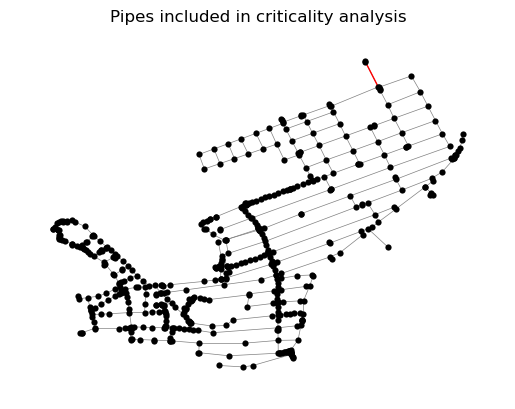

In [2]:
"""
The following example runs a pipe criticality analysis on large diameter pipes
to compute the impact that pipe closures have on pressure in the system.  
The analysis is run using a series of hydraulic simulations with one pipe 
closed at a time and determines if minimum pressure criterion are met 
at each junction.  Note that for many networks, simulations can fail when 
certain pipes are closed. try:except blocks are recommended within the 
simulation loop to catch these instances.
"""
import numpy as np
import wntr

# Create a water network model 
wn = wntr.network.WaterNetworkModel('data\\Vale_do_Amanhecer_Final_temp.inp')

# Adjust simulation options for criticality analyses
analysis_end_time = 24*3600 
wn.options.time.duration = analysis_end_time
wn.options.hydraulic.demand_model = 'PDD'
# wn.options.hydraulic.required_pressure = 8.53
wn.options.hydraulic.minimum_pressure = 0

# Create a list of pipes with large diameter to include in the analysis
# pipes = wn.query_link_attribute('diameter', np.greater_equal, 10*0.0254, 
#                                 link_type=wntr.network.model.Pipe)      
pipes = ['44','415']
# pipes = list(pipes.index)
wntr.graphics.plot_network(wn, link_attribute=pipes, 
                            title='Pipes included in criticality analysis')
                            
# Define the pressure threshold
pressure_threshold = 7


# Execute uma simulação preliminar para determinar se as junções caem abaixo do
# limiar de pressão durante condições normais
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()
min_pressure = results.node['pressure'].loc[:,wn.junction_name_list].min()
below_threshold_normal_conditions = set(min_pressure[min_pressure < pressure_threshold].index) #selecionar os nós em que a pressão minima
                                                                                               #está abaixo do lavor limites[pressure_threshold]
# Execute a análise de criticidade, fechando um tubo para cada simulação


In [3]:
pipes

['44', '415']

Pipe: 44
PIPE 44 STATUS IS CLOSED
J10                        24.726702
J100                       16.201692
J1000                      26.423752
J1002                      20.989081
J1004                      16.879275
                             ...    
J998                       26.795201
V8002_NU                   29.093903
V8002_ND                   10.000000
RAP.VAM.001.LIT.001.000     0.000000
RAP.VAM.001.LIT.002.000     0.000000
Name: 3600, Length: 523, dtype: float64


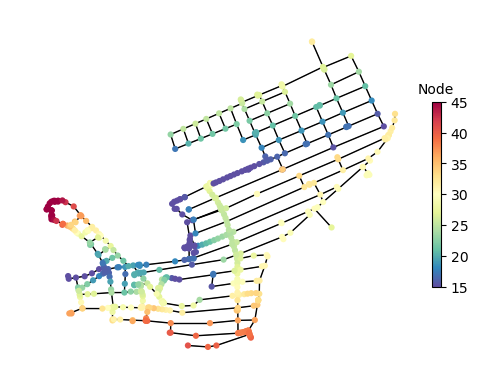

58


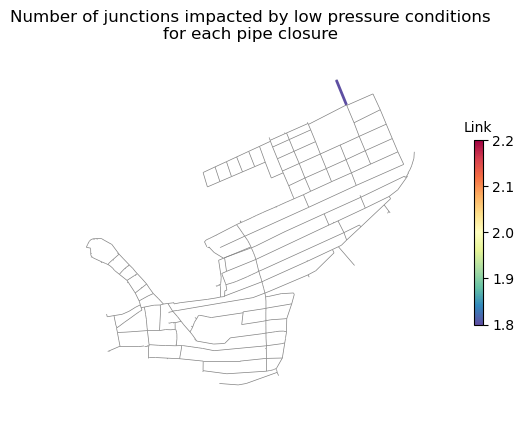

<AxesSubplot:title={'center':'Number of junctions impacted by low pressure conditions\nfor each pipe closure'}>

In [6]:
junctions_impacted = {}
pipes = ['44']
for pipe_name in pipes:

    print('Pipe:', pipe_name)  #printa o trecho a ser analisado 
    
    # Redefine o modelo de rede de água
    wn.reset_initial_values()

    # Adicione um controle para fechar o pipe
    pipe = wn.get_link(pipe_name)        
    act = wntr.network.controls.ControlAction(pipe, 'status', 
                                              wntr.network.LinkStatus.Closed)
    cond = wntr.network.controls.SimTimeCondition(wn, '=', '24:00:00')
    print(act)
    ctrl = wntr.network.controls.Control(cond, act)
    wn.add_control('close pipe ' + pipe_name, ctrl)
        
    # Run a PDD simulation
    sim = wntr.sim.WNTRSimulator(wn)
    results = sim.run_sim()
    # Extract the number of junctions that dip below the minimum pressure threshold
    min_pressure = results.node['pressure'].loc[:,wn.junction_name_list].min()

    below_threshold = set(min_pressure[min_pressure < pressure_threshold].index)
    print(len(below_threshold))       
    # Remove the set of junctions that were below the pressure threshold during 
    # normal conditions and store the result
    junctions_impacted[pipe_name] = below_threshold - below_threshold_normal_conditions
   
    # Remove the control
    wn.remove_control('close pipe ' + pipe_name)

# Extract the number of junctions impacted by low pressure conditions for each pipe closure  
number_of_junctions_impacted = dict([(k,len(v)) for k,v in junctions_impacted.items()])
        
# Plot results         
wntr.graphics.plot_network(wn, link_attribute=number_of_junctions_impacted, 
                           node_size=0, link_width=2, 
                           title='Number of junctions impacted by low pressure conditions\nfor each pipe closure')


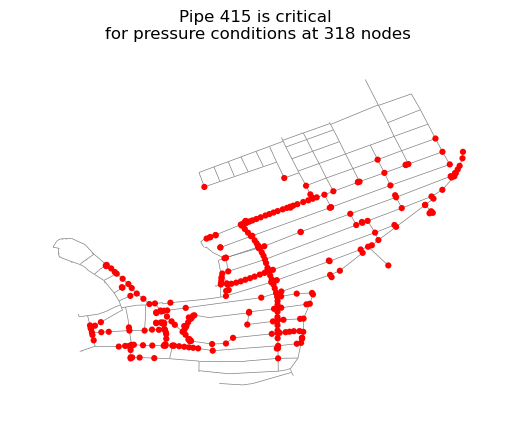

<AxesSubplot:title={'center':'Pipe 415 is critical \nfor pressure conditions at 318 nodes'}>

In [7]:
pipe_name = '415'
wntr.graphics.plot_network(wn, node_attribute=list(junctions_impacted[pipe_name]), 
                           link_attribute=[pipe_name], node_size=20, 
                           title='Pipe ' + pipe_name + ' is critical \nfor pressure conditions at '+str(number_of_junctions_impacted[pipe_name])+' nodes')

Pipe Breaks: ['265'], Start Time: 8.91, End Time: 20.98
Pipe Breaks: ['363'], Start Time: 5.6, End Time: 28.159999999999997
Pipe Breaks: ['202'], Start Time: 3.46, End Time: 23.5
Pipe Breaks: ['339'], Start Time: 7.43, End Time: 26.9
Pipe Breaks: ['4'], Start Time: 2.76, End Time: 23.409999999999997


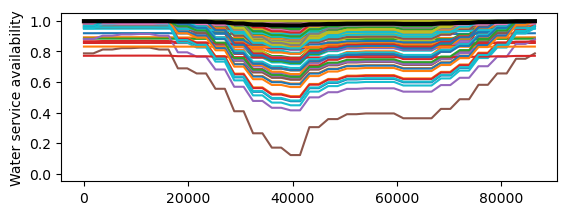

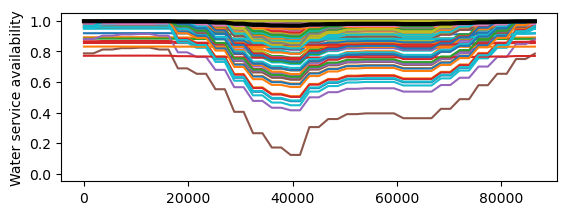

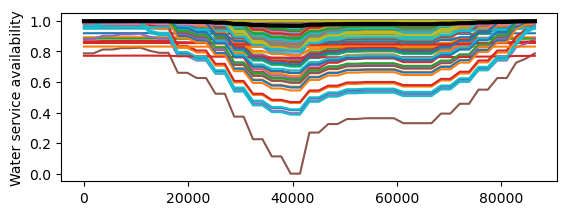

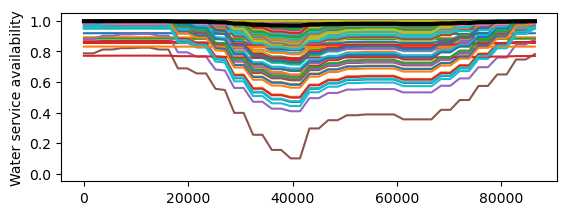

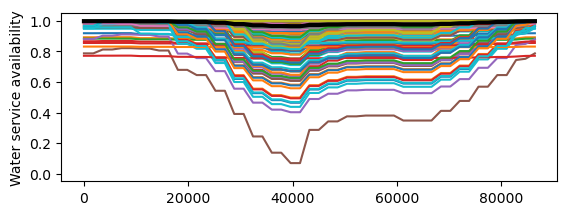

In [19]:
"""
The following example runs multiple realizations of pipe leak scenarios where 
each pipe is assigned a probability failure related to pipe diameter and leak
locations and durations are drawn from probability distributions. Water service
availability and tank water level is plotted for each realization.
"""
import numpy as np
import matplotlib.pyplot as plt
import pickle
import wntr

# Create a water network model
inp_file = 'data\Vale_do_Amanhecer_Final_temp.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Modify the water network model
wn.options.time.duration = 24*3600
wn.options.time.hydraulic_timestep = 1800
wn.options.time.report_timestep = 1800
wn.options.hydraulic.required_pressure = 15
wn.options.hydraulic.minimum_pressure = 0

# Define failure probability for each pipe, based on pipe diameter. Failure
# probability must sum to 1.  Net3 has a few pipes with diameter = 99 inches,
# to exclude these from the set of feasible leak locations, use
# query_link_attribute
pipe_diameters = wn.query_link_attribute('diameter', np.less_equal,
                                         0.9144,  # 36 inches = 0.9144 m
                                         link_type=wntr.network.Pipe)
failure_probability = pipe_diameters/pipe_diameters.sum()

# Pickle the network model and reload it for each realization
f=open('wn.pickle','wb')
pickle.dump(wn,f)
f.close()

# Run 5 realizations
results = {} # Initialize dictionary to store results
np.random.seed(67823) # Set random seed
for i in range(5):

    # Select the number of leaks, random value between 1 and 5
    N = np.random.randint(1,5+1)

    # Select N unique pipes based on failure probability
    pipes_to_fail = np.random.choice(failure_probability.index, 1,
                                     replace=False,
                                     p=failure_probability.values)

    # Select time of failure, uniform dist, between 1 and 10 hours
    time_of_failure = np.round(np.random.uniform(1,10,1)[0], 2)

    # Select duration of failure, uniform dist, between 12 and 24 hours
    duration_of_failure = np.round(np.random.uniform(12,24,1)[0], 2)
    
    # Add leaks to the model
    for pipe_to_fail in pipes_to_fail:
        pipe = wn.get_link(pipe_to_fail)
        leak_diameter = pipe.diameter*0.3
        leak_area=3.14159*(leak_diameter/2)**2
        wn = wntr.morph.split_pipe(wn, pipe_to_fail, pipe_to_fail + '_B', pipe_to_fail+'leak_node')
        leak_node = wn.get_node(pipe_to_fail+'leak_node')
        leak_node.add_leak(wn, area=leak_area,
                          start_time=time_of_failure*3600,
                          end_time=(time_of_failure + duration_of_failure)*3600)

    # Simulate hydraulics and store results
    wn.options.hydraulic.demand_model = 'PDD'
    sim = wntr.sim.WNTRSimulator(wn)
    print('Pipe Breaks: ' + str(pipes_to_fail) + ', Start Time: ' + \
                str(time_of_failure) + ', End Time: ' + \
                str(time_of_failure+duration_of_failure))
    results[i] = sim.run_sim()
    
    # Reload the water network model
    f=open('wn.pickle','rb')
    wn = pickle.load(f)
    f.close()

# Plot water service availability and tank water level for each realization
for i in results.keys():
    
    # Water service availability at each junction and time
    expected_demand = wntr.metrics.expected_demand(wn)
    demand = results[i].node['demand'].loc[:,wn.junction_name_list]
    wsa_nt = wntr.metrics.water_service_availability(expected_demand, demand)
    
    # Average water service availability at each time
    wsa_t = wntr.metrics.water_service_availability(expected_demand.sum(axis=1), 
                                                  demand.sum(axis=1))
                               
    # Tank water level
    tank_level = results[i].node['pressure'].loc[:,wn.tank_name_list]
    
    # Plot results
    plt.figure()
    
    plt.subplot(2,1,1)
    wsa_nt.plot(ax=plt.gca(), legend=False)
    wsa_t.plot(ax=plt.gca(), label='Average', color='k', linewidth=3.0, legend=False)
    plt.ylim( (-0.05, 1.05) )
    plt.ylabel('Water service availability')
    
    # plt.subplot(2,1,2)
    # tank_level.plot(ax=plt.gca())
    # plt.ylim(ymin=0, ymax=12)
    # plt.legend()
    # plt.ylabel('Tank water level (m)')

In [1]:
import numpy as np

In [3]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a[a>5])

[6 7 8 9]


In [4]:
valor = np.array([5000,6000,7000,8000])
jutps = np.array([1,2,3,4])
real = valor * jutps
print(real)

[ 5000 12000 21000 32000]
